## Estimate of urbanisation per region

data taken from
https://senegal.opendataforafrica.org/vydawvf/urbanization-rate

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('dark_background')

In [2]:
data_folder = Path.cwd().parent.parent.joinpath('data', 'external')
file_name = Path(data_folder).glob('*Urban*')

In [3]:
file_name = next(file_name)
file_name

PosixPath('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/Urbanization Rate.csv')

In [4]:
df = pd.read_csv(file_name)

In [5]:
df.set_index('Location', inplace=True)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# fig, ax = plt.subplots(7,2, figsize=(10,20))
# ax = ax.flatten()
cols = np.arange(2014,2020)
pred = pd.DataFrame()
for i, row in df.iterrows():
    regr = LinearRegression()
    temp = row.copy()
    temp.dropna(inplace=True)
    regr.fit(temp.index.values.reshape(-1, 1), temp.values.reshape(-1, 1))
    pred1 = regr.predict(np.arange(2014, 2020).reshape(-1, 1))
    pred1 = pd.DataFrame([pred1.ravel()],columns=cols)
    pred1['Location'] = temp.name
    pred = pred.append(pred1)
    # ax[i].plot(temp.index.values.ravel(), temp.values.ravel())
    # ax[i].plot(np.arange(2014,2019), pred.ravel(), 'r')

In [8]:
pred.set_index('Location', inplace=True)

In [9]:
df = pd.concat([df, pred], axis=1)

In [10]:
df.reset_index(inplace=True)
df = df.melt(id_vars=['Location'], var_name='year')

TypeError: 'value' must be an instance of str or bytes, not a int

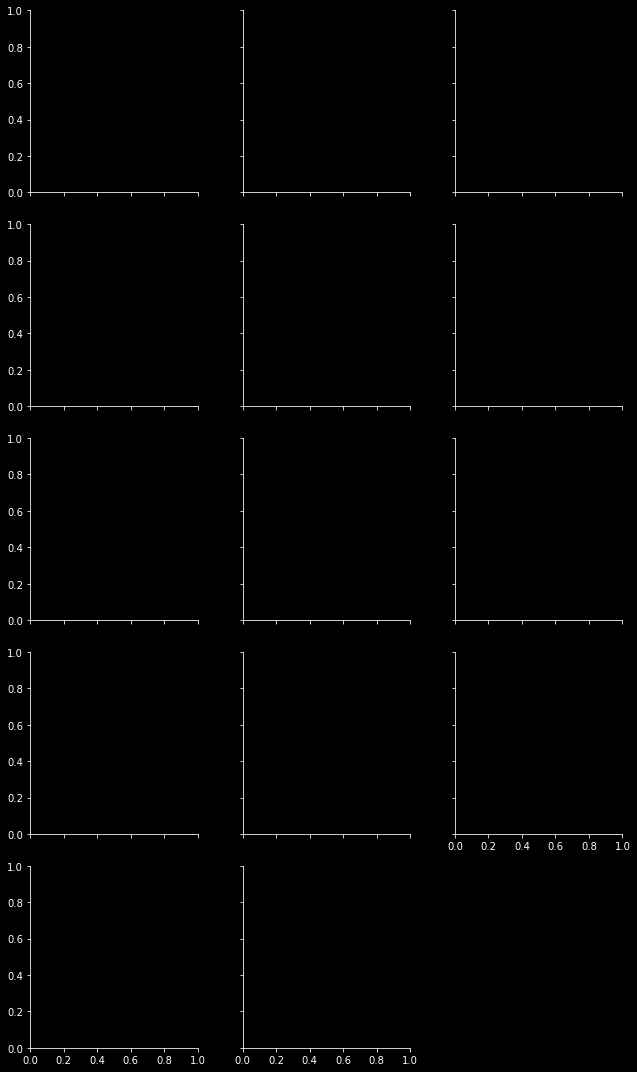

In [11]:
df.dropna(inplace=True)
g = sns.FacetGrid(data = df, col='Location', col_wrap=3)
g.map(sns.lineplot, 'year', 'value')

In [ ]:
sns.lineplot(data=df, x = 'year', y = 'value', hue='Location')

In [12]:
df['value'] = df['value'].astype(float)

In [13]:
df['value']


0      96.300000
1      21.000000
2       9.000000
4      20.700000
6       8.400000
         ...    
135    48.046854
136    20.000000
137    23.551357
138    52.014436
139    51.317726
Name: value, Length: 129, dtype: float64

In [14]:
df['year'] = df['year'].astype(int)

In [15]:
df2 = df[df['year']>2012]

In [22]:
df2.to_csv(Path(data_folder).joinpath('SEN_urbanisation_prediction.csv'))

In [20]:
df2.columns = ['adm1_name', 'year', 'value']

In [21]:
df2


,adm1_name,year,value
42,Dakar,2013,96.400000
43,Diourbel,2013,16.100000
44,Fatick,2013,16.100000
45,Kaffrine,2013,15.800000
46,Kaolack,2013,35.500000
...,...,...,...
135,Saint-Louis,2019,48.046854
136,Sédhiou,2019,20.000000
137,Tambacounda,2019,23.551357
138,Thies,2019,52.014436
